In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()


Saving kc_house_data.csv to kc_house_data.csv


In [4]:
df_house = pd.read_csv('kc_house_data.csv')
df_house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df_house['date'] = pd.to_datetime(df_house['date'], format='%Y%m%dT%H%M%S')
df_house = df_house.convert_dtypes()

In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  Int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  Int64         
 3   bedrooms       21613 non-null  Int64         
 4   bathrooms      21613 non-null  Float64       
 5   sqft_living    21613 non-null  Int64         
 6   sqft_lot       21613 non-null  Int64         
 7   floors         21613 non-null  Float64       
 8   waterfront     21613 non-null  Int64         
 9   view           21613 non-null  Int64         
 10  condition      21613 non-null  Int64         
 11  grade          21613 non-null  Int64         
 12  sqft_above     21613 non-null  Int64         
 13  sqft_basement  21613 non-null  Int64         
 14  yr_built       21613 non-null  Int64         
 15  yr_renovated   2161

In [11]:
df_house.head(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850,3,1.5,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500,3,1.0,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000,3,2.5,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [12]:
def get_bedroom_outliers(df):
    return df[df['bedrooms'] > 6]
outliers_bedroom = get_bedroom_outliers(df_house)
outliers_bedroom



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,2014-06-20,1950000,7,3.5,4640,15235,2.0,0,1,...,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697
1135,4024100951,2015-01-05,420000,7,3.0,2940,8624,1.0,0,0,...,8,1690,1250,1977,0,98155,47.7555,-122.307,1850,8031
1241,7227802030,2014-06-23,350000,7,3.0,2800,9569,1.0,0,2,...,7,1400,1400,1963,0,98056,47.5102,-122.183,2150,7333
1660,9126101740,2014-12-04,490000,8,5.0,2800,2580,2.0,0,0,...,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580
3721,5451100490,2015-01-15,884900,7,4.75,5370,10800,1.5,0,0,...,8,5370,0,1967,0,98040,47.538,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18823,4040500100,2014-10-20,539000,7,2.25,2620,6890,2.0,0,0,...,7,2620,0,1961,0,98007,47.6123,-122.134,2070,7910
18975,1778360150,2014-06-20,1240000,7,5.5,6630,13782,2.0,0,0,...,10,4930,1700,2004,0,98006,47.5399,-122.118,4470,8639
19254,8812401450,2014-12-29,660000,10,3.0,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.32,1810,3745
19302,3756900027,2014-11-25,575000,8,3.0,3840,15990,1.0,0,0,...,7,2530,1310,1961,0,98034,47.7111,-122.211,1380,8172


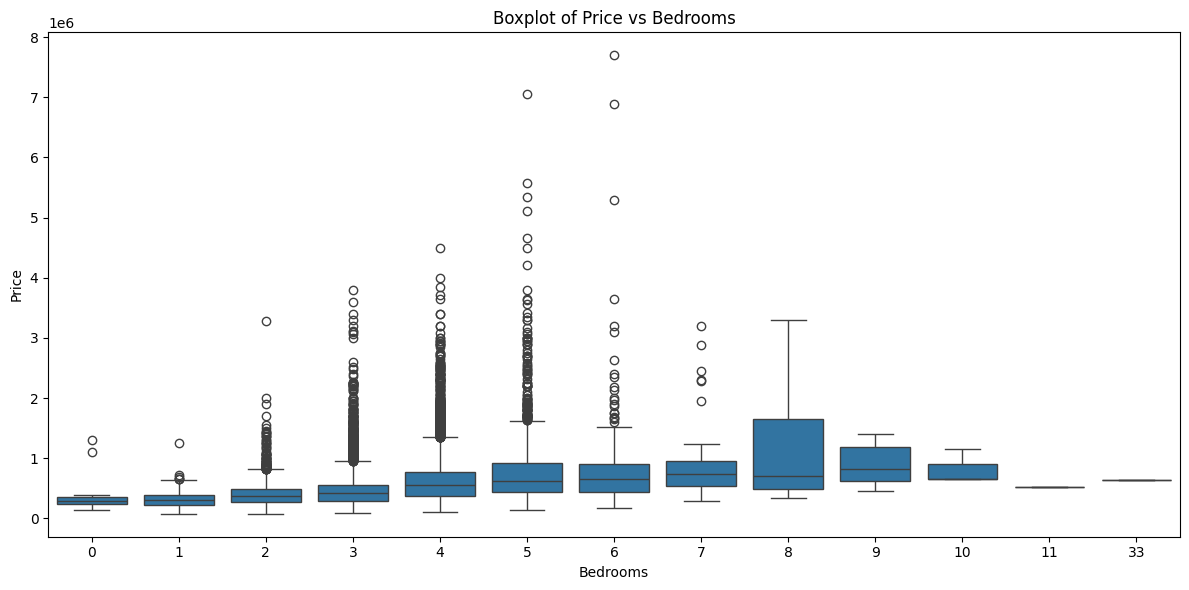

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df_house)
plt.title('Boxplot of Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

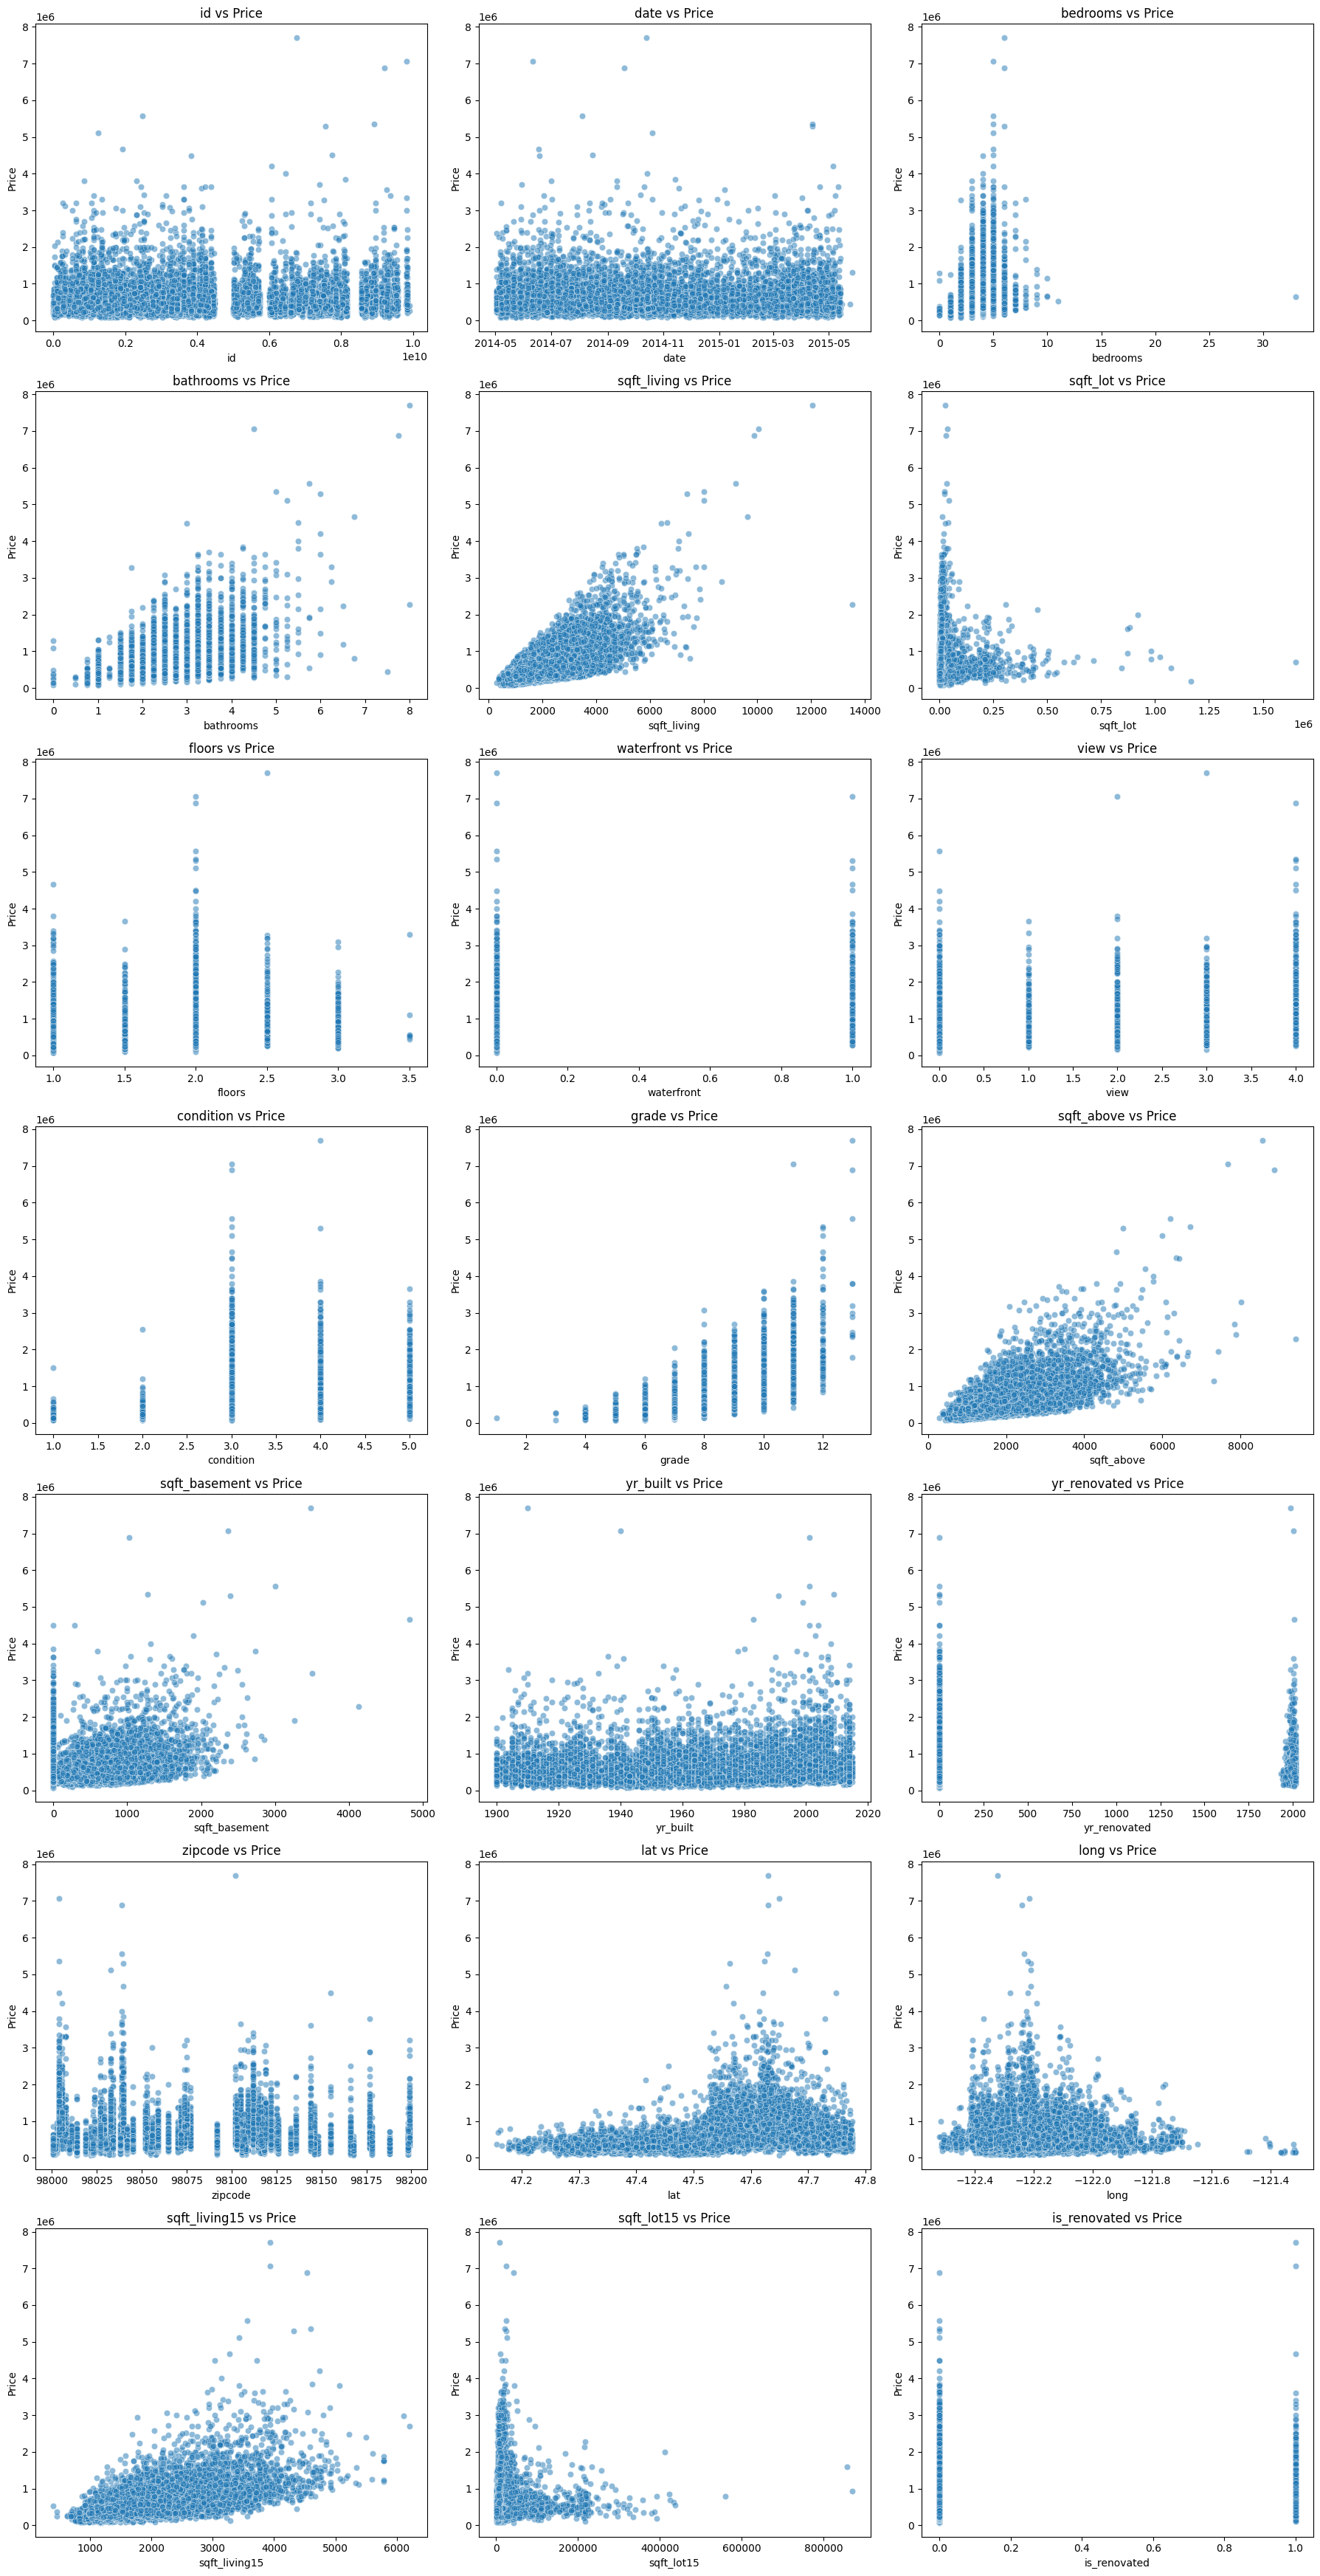

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy tất cả các cột trừ cột 'price'
features = df_house.columns.drop('price')

# Thiết lập số cột và hàng để hiển thị nhiều biểu đồ
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_house[col], y=df_house['price'], alpha=0.5)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [15]:
df_house.drop_duplicates(inplace=True)
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  Int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  Int64         
 3   bedrooms       21613 non-null  Int64         
 4   bathrooms      21613 non-null  Float64       
 5   sqft_living    21613 non-null  Int64         
 6   sqft_lot       21613 non-null  Int64         
 7   floors         21613 non-null  Float64       
 8   waterfront     21613 non-null  Int64         
 9   view           21613 non-null  Int64         
 10  condition      21613 non-null  Int64         
 11  grade          21613 non-null  Int64         
 12  sqft_above     21613 non-null  Int64         
 13  sqft_basement  21613 non-null  Int64         
 14  yr_built       21613 non-null  Int64         
 15  yr_renovated   2161

In [13]:
df_house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.0,21613,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,...,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4580301520.864988,2014-10-29 04:38:01.959931648,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1000102.0,2014-05-02 00:00:00,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,...,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0
25%,2123049194.0,2014-07-22 00:00:00,321950.0,3.0,1.75,1427.0,5040.0,1.0,0.0,0.0,...,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.471,-122.328,1490.0,5100.0
50%,3904930410.0,2014-10-16 00:00:00,450000.0,3.0,2.25,1910.0,7618.0,1.5,0.0,0.0,...,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.5718,-122.23,1840.0,7620.0
75%,7308900445.0,2015-02-17 00:00:00,645000.0,4.0,2.5,2550.0,10688.0,2.0,0.0,0.0,...,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.678,-122.125,2360.0,10083.0
max,9900000190.0,2015-05-27 00:00:00,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,...,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0
std,2876565571.312057,NaN,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.67924,53.505026,0.138564,0.140828,685.391304,27304.179631


In [19]:
numeric_columns = ['date', 'price','bedrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','yr_built','yr_renovated','sqft_living15','sqft_lot15','condition']
correlation_matrix = df_house[numeric_columns].corr()
correlation_matrix

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,condition
date,1.000000,-0.004357,-0.016800,-0.034559,0.006313,-0.022491,0.001356,-0.001800,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,-0.031515,0.002566,-0.050769
price,-0.004357,1.000000,0.308350,0.702035,0.089661,0.256794,0.266369,0.397293,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447,0.036362
bedrooms,-0.016800,0.308350,1.000000,0.576671,0.031703,0.175429,-0.006582,0.079532,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244,0.028472
sqft_living,-0.034559,0.702035,0.576671,1.000000,0.172826,0.353949,0.103818,0.284611,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286,-0.058753
sqft_lot,0.006313,0.089661,0.031703,0.172826,1.000000,-0.005201,0.021604,0.074710,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557,-0.008958
floors,-0.022491,0.256794,0.175429,0.353949,-0.005201,1.000000,0.023698,0.029444,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269,-0.263768
waterfront,0.001356,0.266369,-0.006582,0.103818,0.021604,0.023698,1.000000,0.401857,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703,0.016653
view,-0.001800,0.397293,0.079532,0.284611,0.074710,0.029444,0.401857,1.000000,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575,0.045990
grade,-0.039912,0.667434,0.356967,0.762704,0.113621,0.458183,0.082775,0.251321,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248,-0.144674
sqft_above,-0.027924,0.605567,0.477600,0.876597,0.183512,0.523885,0.072075,0.167649,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050,-0.158214


Text(0.5, 1.0, 'Correlation Heatmap')

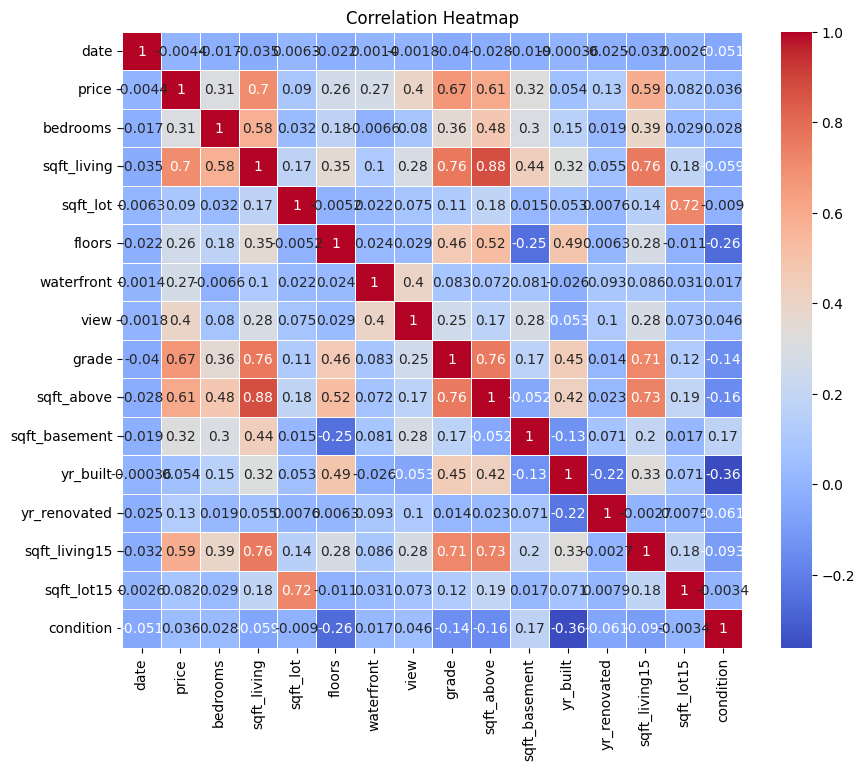

In [20]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')


Text(0.5, 1.0, 'Correlation Heatmap')

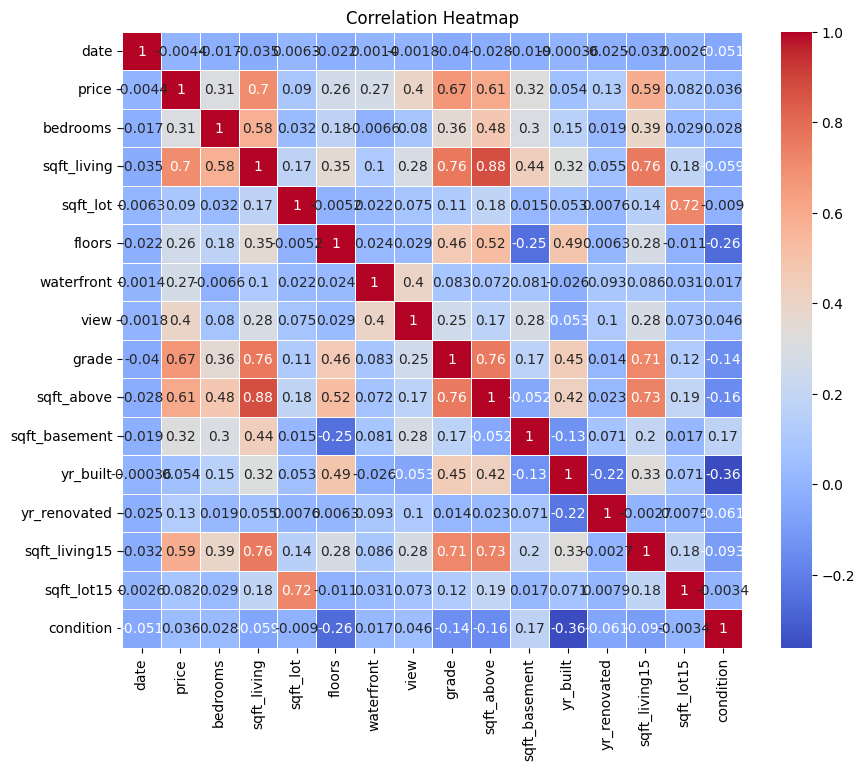

In [21]:
df_house['is_renovated'] = df_house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
